## Import modules 

In [4]:
import datetime #to convert timestamp format to simple datetime formt.
import csv #to create CSV file.
import requests #to create a function to call the API when we need it.
import time #to handle time-related functions.
import pandas as pd #to read the csv file.
import matplotlib.pyplot as plt #to plot out data.

## Convert to *timestamp* format

In [5]:
def str_to_timestamp(date):
    """
        string to timestamp date format
    """
    date = datetime.datetime.strptime(date,'%Y%m%d') #format
    date = date.timestamp()
    return str(int(date)) #delete float part and convert to string to use in base url

## Get all three-months (2020/01/01--2020/03/30) posts data.

In [6]:
def make_next_date(date):
    """
        get date as timestamp format and add one day to this date   
    """
    next_date = datetime.datetime.utcfromtimestamp(int(date)) # to datetime format
    next_date += datetime.timedelta(days=1) # add one day
    next_date = next_date.timestamp() #convert to timestamp
    print( datetime.datetime.utcfromtimestamp(int(next_date)).strftime('%Y-%m-%d %H:%M:%S'))
    return str(int(next_date)) # don't need float part!

## Save to CSV file 

In [8]:
def save_to_csv(posts,subreddit):
    """
        save posts to csv file with subreddit name
    """
    with open(subreddit+".csv", 'w',encoding="utf-8",newline='') as csvfile: 
        #make column label based on one of post's fields
        writer = csv.DictWriter(csvfile, fieldnames = posts[0].keys() )
        writer.writeheader() 
        writer.writerows(posts)

## Get the submissions data from pushshift + update the search date + then save the result into a CSV

In [26]:
def get_pushshift_posts(first_date,last_date,subreddit):
    """
        get reddit posts from pushshift api within given range and 
        with one day step using subreddit keyword 
    """

    three_month_posts = []
 
    #make the first & next_dates
    first_date = str_to_timestamp(first_date)
    last_date = str_to_timestamp(last_date)
    #make next 
    next_date = make_next_date(first_date)                                                    
    while True:
            #make the pushshift url with first_date and next_date with respect to our key field information that we wanna extract! 
            base_url = f"https://api.pushshift.io/reddit/submission/search/?before={next_date}&after={first_date}&fields=created_utc,author,title,num_comments,url,upvote,score&size=500&limit=100&sort=desc&subreddit={subreddit}"
            print(base_url)
            response = requests.get(base_url) #make a call to pushshift api
            if response.status_code == 200: #if request is successful
                re = response.json()# get json part of response
                posts = re['data'] # get the value part of data (api return dict object with key data and posts as value)                
                #append to all the posts one by one 
                [three_month_posts.append(i) for i in posts]
                print(len(three_month_posts))
                first_date = next_date #take the next day as start 
                if int(first_date) > int(last_date): 
                    break
                next_date = make_next_date(next_date) #make the next date
           
            else:
                #if request failed due to the large number of sent requests, wait for 1 sec then send new request! 
                time.sleep(1)
                #save the returned data into a csv file
    save_to_csv(three_month_posts,subreddit)
    return three_month_posts

vim=get_pushshift_posts("20200101","20200330","vim") #take posts data of vim subreddit of three months(2020/01/01--2020/03/30) 
emacs=get_pushshift_posts("20200101","20200330","emacs")#take posts data of emacs subreddit of three months(2020/01/01--2020/03/30)


2020-01-01 17:00:00
https://api.pushshift.io/reddit/submission/search/?before=1577898000&after=1577824200&fields=created_utc,author,title,num_comments,url,upvote,score&size=500&limit=100&sort=desc&subreddit=vim
5
2020-01-02 13:30:00
https://api.pushshift.io/reddit/submission/search/?before=1577971800&after=1577898000&fields=created_utc,author,title,num_comments,url,upvote,score&size=500&limit=100&sort=desc&subreddit=vim
https://api.pushshift.io/reddit/submission/search/?before=1577971800&after=1577898000&fields=created_utc,author,title,num_comments,url,upvote,score&size=500&limit=100&sort=desc&subreddit=vim
https://api.pushshift.io/reddit/submission/search/?before=1577971800&after=1577898000&fields=created_utc,author,title,num_comments,url,upvote,score&size=500&limit=100&sort=desc&subreddit=vim
https://api.pushshift.io/reddit/submission/search/?before=1577971800&after=1577898000&fields=created_utc,author,title,num_comments,url,upvote,score&size=500&limit=100&sort=desc&subreddit=vim
17


https://api.pushshift.io/reddit/submission/search/?before=1579300200&after=1579226400&fields=created_utc,author,title,num_comments,url,upvote,score&size=500&limit=100&sort=desc&subreddit=vim
https://api.pushshift.io/reddit/submission/search/?before=1579300200&after=1579226400&fields=created_utc,author,title,num_comments,url,upvote,score&size=500&limit=100&sort=desc&subreddit=vim
https://api.pushshift.io/reddit/submission/search/?before=1579300200&after=1579226400&fields=created_utc,author,title,num_comments,url,upvote,score&size=500&limit=100&sort=desc&subreddit=vim
195
2020-01-18 19:00:00
https://api.pushshift.io/reddit/submission/search/?before=1579374000&after=1579300200&fields=created_utc,author,title,num_comments,url,upvote,score&size=500&limit=100&sort=desc&subreddit=vim
https://api.pushshift.io/reddit/submission/search/?before=1579374000&after=1579300200&fields=created_utc,author,title,num_comments,url,upvote,score&size=500&limit=100&sort=desc&subreddit=vim
https://api.pushshift

https://api.pushshift.io/reddit/submission/search/?before=1580554800&after=1580481000&fields=created_utc,author,title,num_comments,url,upvote,score&size=500&limit=100&sort=desc&subreddit=vim
386
2020-02-02 07:30:00
https://api.pushshift.io/reddit/submission/search/?before=1580628600&after=1580554800&fields=created_utc,author,title,num_comments,url,upvote,score&size=500&limit=100&sort=desc&subreddit=vim
https://api.pushshift.io/reddit/submission/search/?before=1580628600&after=1580554800&fields=created_utc,author,title,num_comments,url,upvote,score&size=500&limit=100&sort=desc&subreddit=vim
https://api.pushshift.io/reddit/submission/search/?before=1580628600&after=1580554800&fields=created_utc,author,title,num_comments,url,upvote,score&size=500&limit=100&sort=desc&subreddit=vim
391
2020-02-03 04:00:00
https://api.pushshift.io/reddit/submission/search/?before=1580702400&after=1580628600&fields=created_utc,author,title,num_comments,url,upvote,score&size=500&limit=100&sort=desc&subreddit=v

https://api.pushshift.io/reddit/submission/search/?before=1581809400&after=1581735600&fields=created_utc,author,title,num_comments,url,upvote,score&size=500&limit=100&sort=desc&subreddit=vim
https://api.pushshift.io/reddit/submission/search/?before=1581809400&after=1581735600&fields=created_utc,author,title,num_comments,url,upvote,score&size=500&limit=100&sort=desc&subreddit=vim
https://api.pushshift.io/reddit/submission/search/?before=1581809400&after=1581735600&fields=created_utc,author,title,num_comments,url,upvote,score&size=500&limit=100&sort=desc&subreddit=vim
563
2020-02-16 20:00:00
https://api.pushshift.io/reddit/submission/search/?before=1581883200&after=1581809400&fields=created_utc,author,title,num_comments,url,upvote,score&size=500&limit=100&sort=desc&subreddit=vim
576
2020-02-17 16:30:00
https://api.pushshift.io/reddit/submission/search/?before=1581957000&after=1581883200&fields=created_utc,author,title,num_comments,url,upvote,score&size=500&limit=100&sort=desc&subreddit=v

https://api.pushshift.io/reddit/submission/search/?before=1583211600&after=1583137800&fields=created_utc,author,title,num_comments,url,upvote,score&size=500&limit=100&sort=desc&subreddit=vim
761
2020-03-04 01:30:00
https://api.pushshift.io/reddit/submission/search/?before=1583285400&after=1583211600&fields=created_utc,author,title,num_comments,url,upvote,score&size=500&limit=100&sort=desc&subreddit=vim
https://api.pushshift.io/reddit/submission/search/?before=1583285400&after=1583211600&fields=created_utc,author,title,num_comments,url,upvote,score&size=500&limit=100&sort=desc&subreddit=vim
https://api.pushshift.io/reddit/submission/search/?before=1583285400&after=1583211600&fields=created_utc,author,title,num_comments,url,upvote,score&size=500&limit=100&sort=desc&subreddit=vim
https://api.pushshift.io/reddit/submission/search/?before=1583285400&after=1583211600&fields=created_utc,author,title,num_comments,url,upvote,score&size=500&limit=100&sort=desc&subreddit=vim
https://api.pushshift

https://api.pushshift.io/reddit/submission/search/?before=1584392400&after=1584318600&fields=created_utc,author,title,num_comments,url,upvote,score&size=500&limit=100&sort=desc&subreddit=vim
https://api.pushshift.io/reddit/submission/search/?before=1584392400&after=1584318600&fields=created_utc,author,title,num_comments,url,upvote,score&size=500&limit=100&sort=desc&subreddit=vim
https://api.pushshift.io/reddit/submission/search/?before=1584392400&after=1584318600&fields=created_utc,author,title,num_comments,url,upvote,score&size=500&limit=100&sort=desc&subreddit=vim
https://api.pushshift.io/reddit/submission/search/?before=1584392400&after=1584318600&fields=created_utc,author,title,num_comments,url,upvote,score&size=500&limit=100&sort=desc&subreddit=vim
https://api.pushshift.io/reddit/submission/search/?before=1584392400&after=1584318600&fields=created_utc,author,title,num_comments,url,upvote,score&size=500&limit=100&sort=desc&subreddit=vim
https://api.pushshift.io/reddit/submission/se

https://api.pushshift.io/reddit/submission/search/?before=1585459800&after=1585389600&fields=created_utc,author,title,num_comments,url,upvote,score&size=500&limit=100&sort=desc&subreddit=vim
1081
2020-03-30 01:00:00
https://api.pushshift.io/reddit/submission/search/?before=1585530000&after=1585459800&fields=created_utc,author,title,num_comments,url,upvote,score&size=500&limit=100&sort=desc&subreddit=vim
1094
2020-01-01 17:00:00
https://api.pushshift.io/reddit/submission/search/?before=1577898000&after=1577824200&fields=created_utc,author,title,num_comments,url,upvote,score&size=500&limit=100&sort=desc&subreddit=emacs
10
2020-01-02 13:30:00
https://api.pushshift.io/reddit/submission/search/?before=1577971800&after=1577898000&fields=created_utc,author,title,num_comments,url,upvote,score&size=500&limit=100&sort=desc&subreddit=emacs
https://api.pushshift.io/reddit/submission/search/?before=1577971800&after=1577898000&fields=created_utc,author,title,num_comments,url,upvote,score&size=500&li

341
2020-01-23 22:00:00
https://api.pushshift.io/reddit/submission/search/?before=1579816800&after=1579743000&fields=created_utc,author,title,num_comments,url,upvote,score&size=500&limit=100&sort=desc&subreddit=emacs
356
2020-01-24 18:30:00
https://api.pushshift.io/reddit/submission/search/?before=1579890600&after=1579816800&fields=created_utc,author,title,num_comments,url,upvote,score&size=500&limit=100&sort=desc&subreddit=emacs
368
2020-01-25 15:00:00
https://api.pushshift.io/reddit/submission/search/?before=1579964400&after=1579890600&fields=created_utc,author,title,num_comments,url,upvote,score&size=500&limit=100&sort=desc&subreddit=emacs
386
2020-01-26 11:30:00
https://api.pushshift.io/reddit/submission/search/?before=1580038200&after=1579964400&fields=created_utc,author,title,num_comments,url,upvote,score&size=500&limit=100&sort=desc&subreddit=emacs
https://api.pushshift.io/reddit/submission/search/?before=1580038200&after=1579964400&fields=created_utc,author,title,num_comments,u

811
2020-02-24 12:30:00
https://api.pushshift.io/reddit/submission/search/?before=1582547400&after=1582473600&fields=created_utc,author,title,num_comments,url,upvote,score&size=500&limit=100&sort=desc&subreddit=emacs
822
2020-02-25 09:00:00
https://api.pushshift.io/reddit/submission/search/?before=1582621200&after=1582547400&fields=created_utc,author,title,num_comments,url,upvote,score&size=500&limit=100&sort=desc&subreddit=emacs
837
2020-02-26 05:30:00
https://api.pushshift.io/reddit/submission/search/?before=1582695000&after=1582621200&fields=created_utc,author,title,num_comments,url,upvote,score&size=500&limit=100&sort=desc&subreddit=emacs
852
2020-02-27 02:00:00
https://api.pushshift.io/reddit/submission/search/?before=1582768800&after=1582695000&fields=created_utc,author,title,num_comments,url,upvote,score&size=500&limit=100&sort=desc&subreddit=emacs
864
2020-02-27 22:30:00
https://api.pushshift.io/reddit/submission/search/?before=1582842600&after=1582768800&fields=created_utc,aut

1254
2020-03-26 19:00:00
https://api.pushshift.io/reddit/submission/search/?before=1585249200&after=1585179000&fields=created_utc,author,title,num_comments,url,upvote,score&size=500&limit=100&sort=desc&subreddit=emacs
1275
2020-03-27 14:30:00
https://api.pushshift.io/reddit/submission/search/?before=1585319400&after=1585249200&fields=created_utc,author,title,num_comments,url,upvote,score&size=500&limit=100&sort=desc&subreddit=emacs
1282
2020-03-28 10:00:00
https://api.pushshift.io/reddit/submission/search/?before=1585389600&after=1585319400&fields=created_utc,author,title,num_comments,url,upvote,score&size=500&limit=100&sort=desc&subreddit=emacs
1293
2020-03-29 05:30:00
https://api.pushshift.io/reddit/submission/search/?before=1585459800&after=1585389600&fields=created_utc,author,title,num_comments,url,upvote,score&size=500&limit=100&sort=desc&subreddit=emacs
1304
2020-03-30 01:00:00
https://api.pushshift.io/reddit/submission/search/?before=1585530000&after=1585459800&fields=created_ut

## Used pandas mondule to read the CSV then convert *timestamp* format to *datetime* format to be shown in *datetime* format in the CSV

In [27]:
df1 = pd.read_csv('vim.csv',encoding='utf8') #read the vim csv 
df2 = pd.read_csv('emacs.csv',encoding='utf8') #read the emacs csv 
df1['created_utc'] = pd.to_datetime(df1['created_utc'],unit='s').dt.date #vim convert to datetime!
df2['created_utc'] = pd.to_datetime(df2['created_utc'],unit='s').dt.date #emacs convert to datetime!

## Check to see whether our submission data extraction and CSV of both of the subreddits *(emacs+vim)* were successful

In [48]:
df1 #vim subreddit CSV

,author,created_utc,num_comments,score,title,url
0,nebulaeandstars,2020-01-01,0,1,How many of yiuhrol keep accidentally doing th...,https://www.reddit.com/r/vim/comments/eij4s8/h...
1,arumoy_shome,2020-01-01,0,1,New plugin: vim-text-lists,https://www.reddit.com/r/vim/comments/eihldw/n...
2,liuchengxu,2020-01-01,41,1,vim-clap: to be a performant fuzzy finder and ...,https://www.reddit.com/r/vim/comments/eiazzo/v...
3,DivNectar,2019-12-31,3,1,Install NeoVim On Windows 10,https://www.reddit.com/r/vim/comments/eiad24/i...
4,ellipticcode0,2019-12-31,14,1,How to stop vim to expand cabbr - command-line...,https://www.reddit.com/r/vim/comments/eia1hj/h...
...,...,...,...,...,...,...
1089,eva_kuator,2020-03-29,7,1,I wish I never discovered vim,https://www.reddit.com/r/vim/comments/fr77uh/i...
1090,speckz,2020-03-29,28,1,A Definitive Guide to Enabling Italics in Vim ...,https://rsapkf.netlify.com/blog/enabling-itali...
1091,J-Vim,2020-03-29,12,1,Incorrect download of Vimtex,https://www.reddit.com/r/vim/comments/fr6qnk/i...
1092,VoldikSS,2020-03-29,2,1,MySQL keywords completion using coc.nvim,https://www.reddit.com/r/vim/comments/fr2tcg/m...


In [49]:
df2 #emacs subreddit CSV

,author,created_utc,num_comments,score,title,url
0,jack-of-some,2020-01-01,9,1,Python Dev Setup in Spacemacs,https://youtu.be/r-BHx7VNX5s
1,karlicoss,2020-01-01,2,1,org-sync: synchronize your github/gitlab issue...,/r/orgmode/comments/egs9nt/orgsync_synchronize...
2,_priyadarshan,2020-01-01,6,1,Running notmuch on Windows Emacs,https://www.reddit.com/r/emacs/comments/eigot5...
3,rock-emacs,2020-01-01,7,1,Changing the behavior of RET in Emacs to be li...,https://www.reddit.com/r/emacs/comments/eifdhf...
4,knubeee,2020-01-01,2,1,Magit-file-dispatch not restricted to current ...,https://www.reddit.com/r/emacs/comments/eiezis...
...,...,...,...,...,...,...
1313,oneerpy,2020-03-29,34,1,Which non text editing things in emacs you use?,https://www.reddit.com/r/emacs/comments/fr7nfd...
1314,sfrzxyz,2020-03-29,45,1,Looking for feedback on my project - Learn Ema...,https://www.reddit.com/r/emacs/comments/fr655e...
1315,SteamingBeer,2020-03-29,12,1,Debugger suggestion for python,https://www.reddit.com/r/emacs/comments/fr35f2...
1316,tldrthestoryofmylife,2020-03-29,0,1,Thoughts on the Future of Emacs,https://www.reddit.com/r/emacs/comments/fr2xyh...


## used matplotlib for plotting both subreddits(emacs + vim) to have comparison of the key chosen fields 

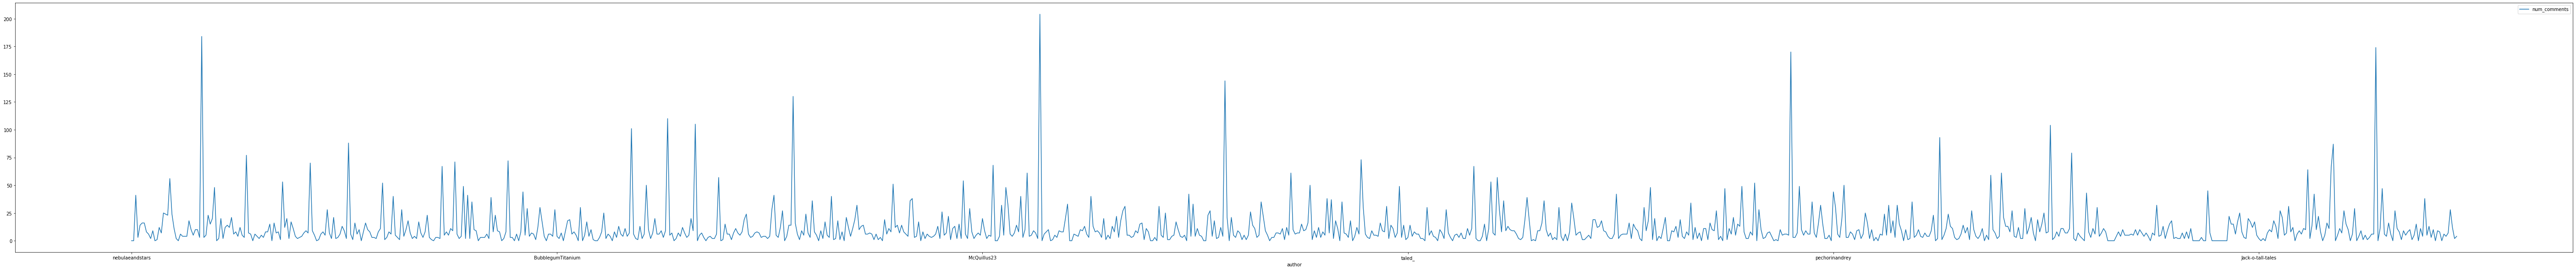

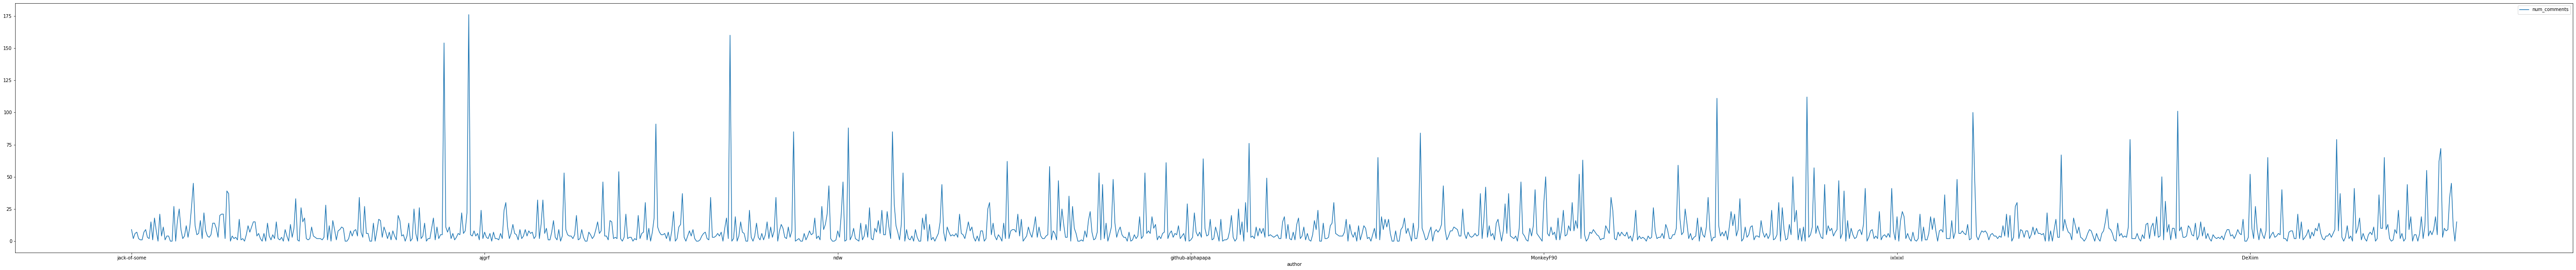

In [54]:
#plot the authors name and number of their proposed comments(num_comments) beneath of each posts in both vim+emacs subreddits! 
df1.plot(x='author', y='num_comments', legend=True, figsize=(100,10)) #vim
df2.plot(x='author', y='num_comments', legend=True, figsize=(100,10)) #emacs

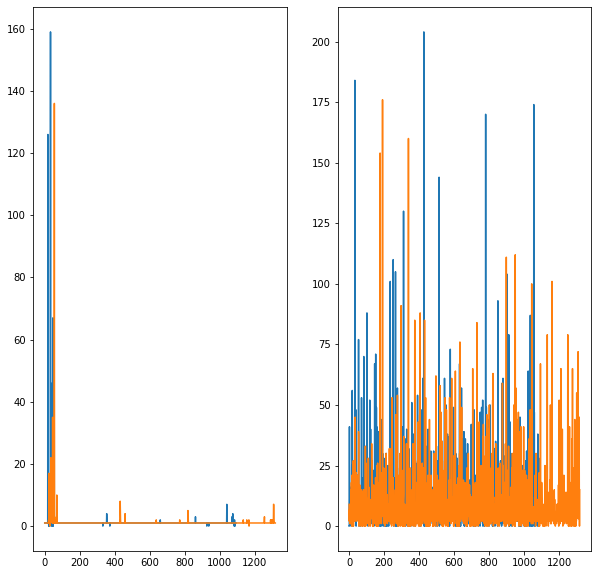

In [57]:
#simotaniously comparison of #(number of comments) and (the scores) of vim and emacs subreddits with plot
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,10))
axes[0].plot(df1['score']) #vim
axes[0].plot(df2['score']) #emacs
axes[1].plot(df1['num_comments']) #vim
axes[1].plot(df2['num_comments']) #emacs